# CI/CD with Docker compose and EKS
> We will first convert our ML app into docker image and register it on AWS ECR (elastic container registry). Then we will use Amazon Elastic Kubernetes Service (Amazon EKS) to deploy the app as a docker container.

- toc: true
- badges: false
- comments: true
- categories: [CICD, MLOps, Docker, EKS, Kubernetes, ECR]
- image:

## Introduction

Duration: 5

### What you'll learn?

- Build a docker image and run as a container
- Register the docker image on AWS ECR
- Deploy the docker image on AWS EKS
- Techstack: NodeJS app, MongoDB, Docker, AWS ECR, and AWS EKS

### Why is this important?

- Continuous integration and deployment (CI/CD) is an important skill in MLOps

### How it will work?

1. Use a pre-built nodeJS which is using MongoDB for data storage, pull this app from a git repo
2. Pull mongodb and mongodb-express images docker images from docker hub
3. Build the app's docker image
4. Write a docker compose file that will stitch all these docker images together
5. Run the docker compose locally to verify that everything is working fine
6. Signup/Login to AWS and configure the AWS CLI
7. Push the docker compose to AWS's ECR - AWS's container registry portal
8. Use AWS's EKS to run the docker

### Who is this for?

- People who are new in MLOps
- People looking to strengthen their MLOps CI/CD skills

<!---------------------------->

## Login to PWD

Duration: 5

We will use *Play with docker* for this tutorial. 

### Sign-in

Go to [this](https://labs.play-with-docker.com/) link and login. The landing page will look like this:

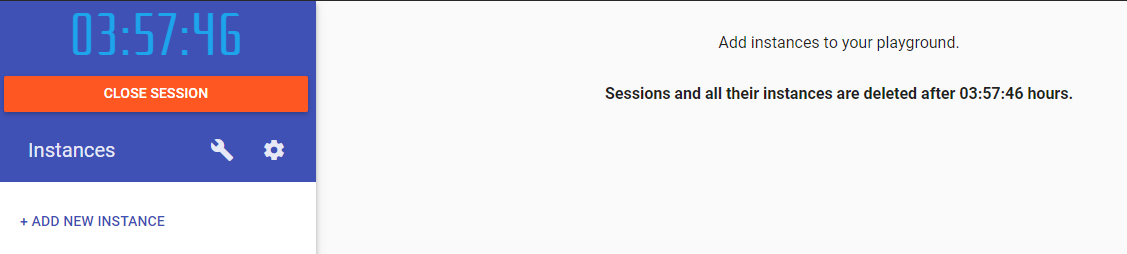

### Create an instance

Click on *ADD NEW INSTANCE*. After clicking, it will look like this:

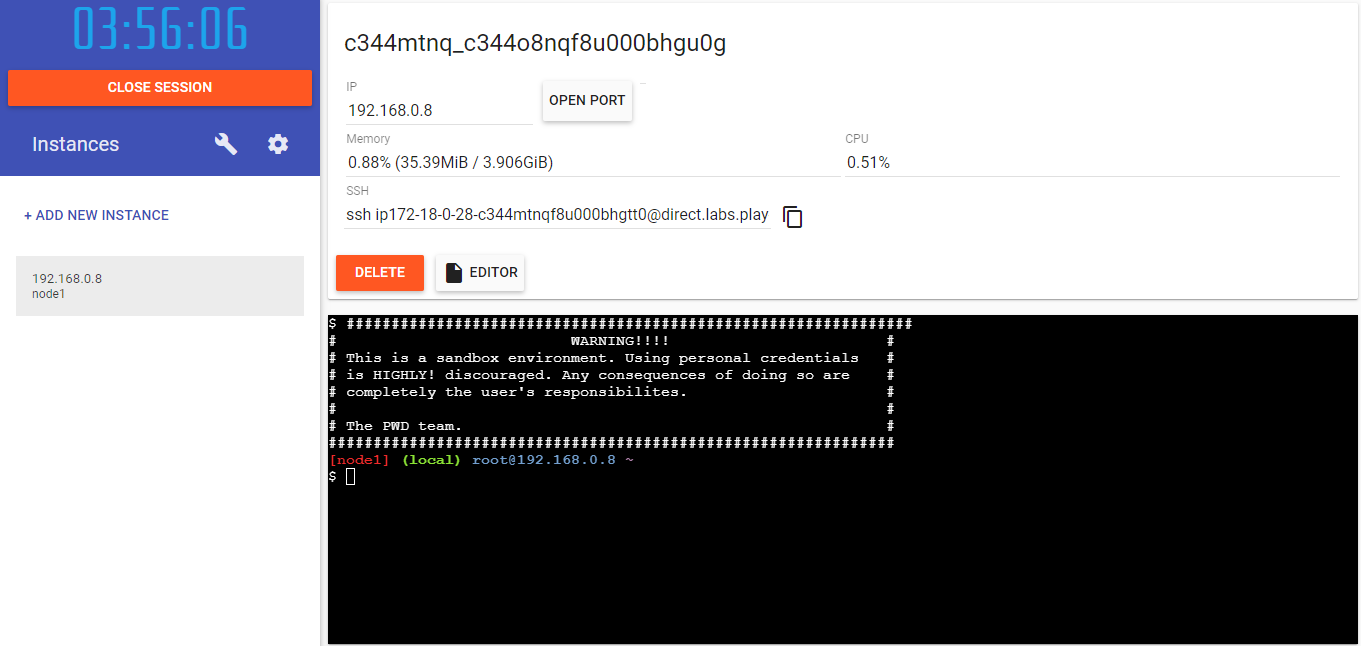

You are ready to run the dockers in a free cloud environment!

Note: to paste the command in PWD, use `ctrl`+`shift`+`v`.

<!---------------------------->

## Develop your model

Duration: 2

First we will develop our ML model which we want to deploy and serve. It can be as simple as a popularity based item recommendation model. In this tutorial, we are going to use a simple pre-built nodejs app, so that we can keep our focus on MLOps part.

### Clone the app repository

`git clone https://gitlab.com/nanuchi/techworld-js-docker-demo-app.git`



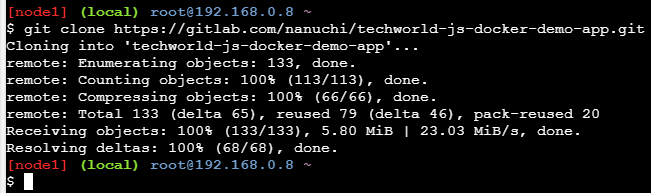

### Explore

Explore the HTML webpage front-end file`./app/index.html`, and the Node JS back-end file `./app/server.js`

<!---------------------------->

## Run the app

Duration: 2

### Install NodeJS

- `apk add --update nodejs npm`
- `npm install express`

### Start the app

Start by running Node JS server: `node server.js`. 



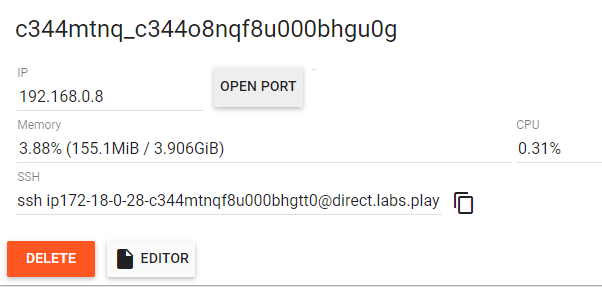

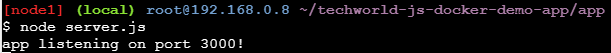

In PWD, we have to open port to access the site. Click on *OPEN PORT* and enter 3000. 

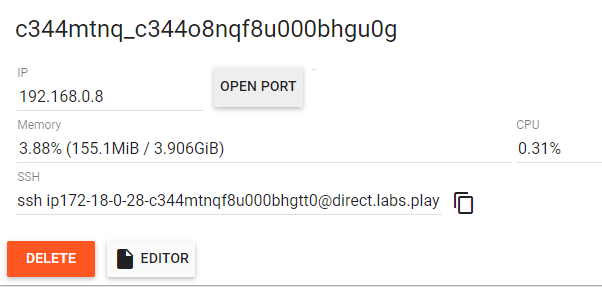

A new window will pop-up which will look like this:

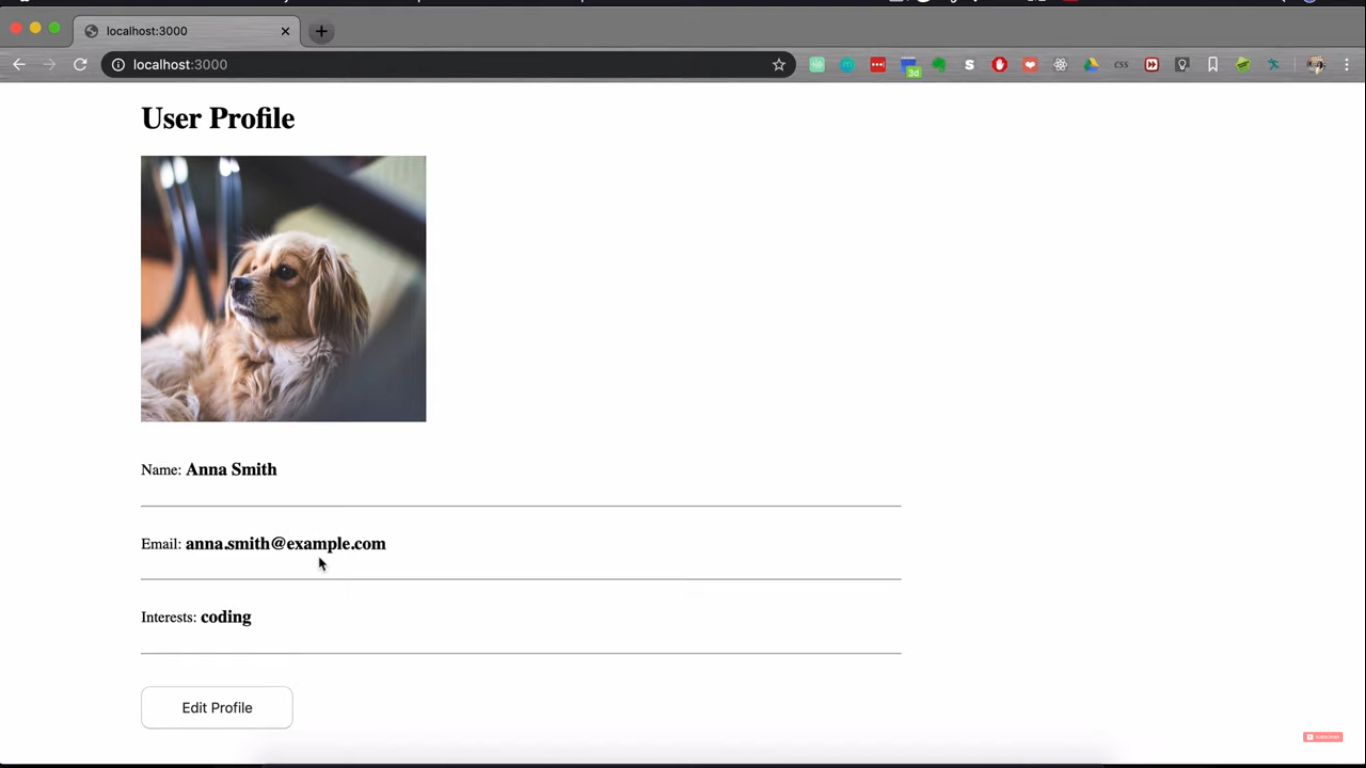

## Understand the basics

Duration: 2

This step is just for understanding. You don't need to run the commands.

### Image pulling

- Pull mongoDB docker image: `docker pull mongo`
- Pull mongoDB express: `docker pull mongo-express`

### What is docker network

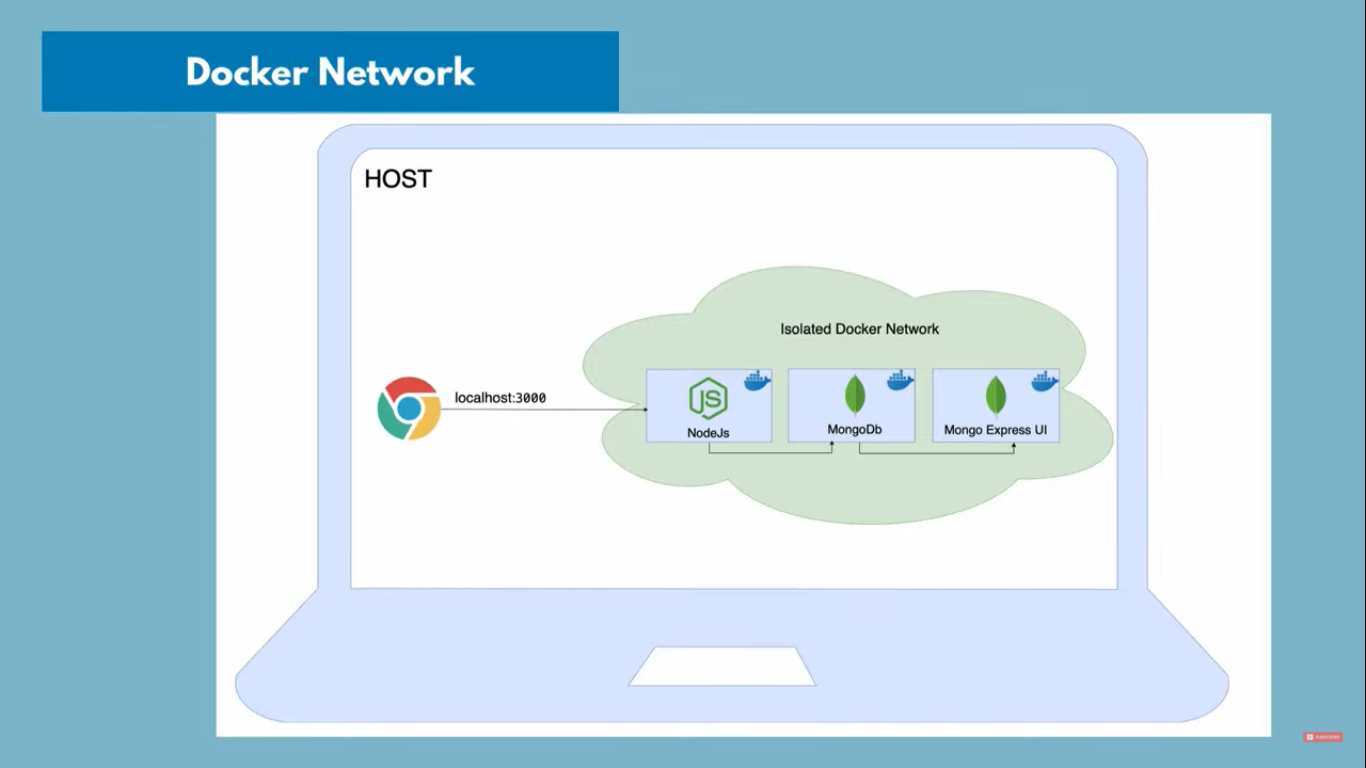

### What is Dockerfile

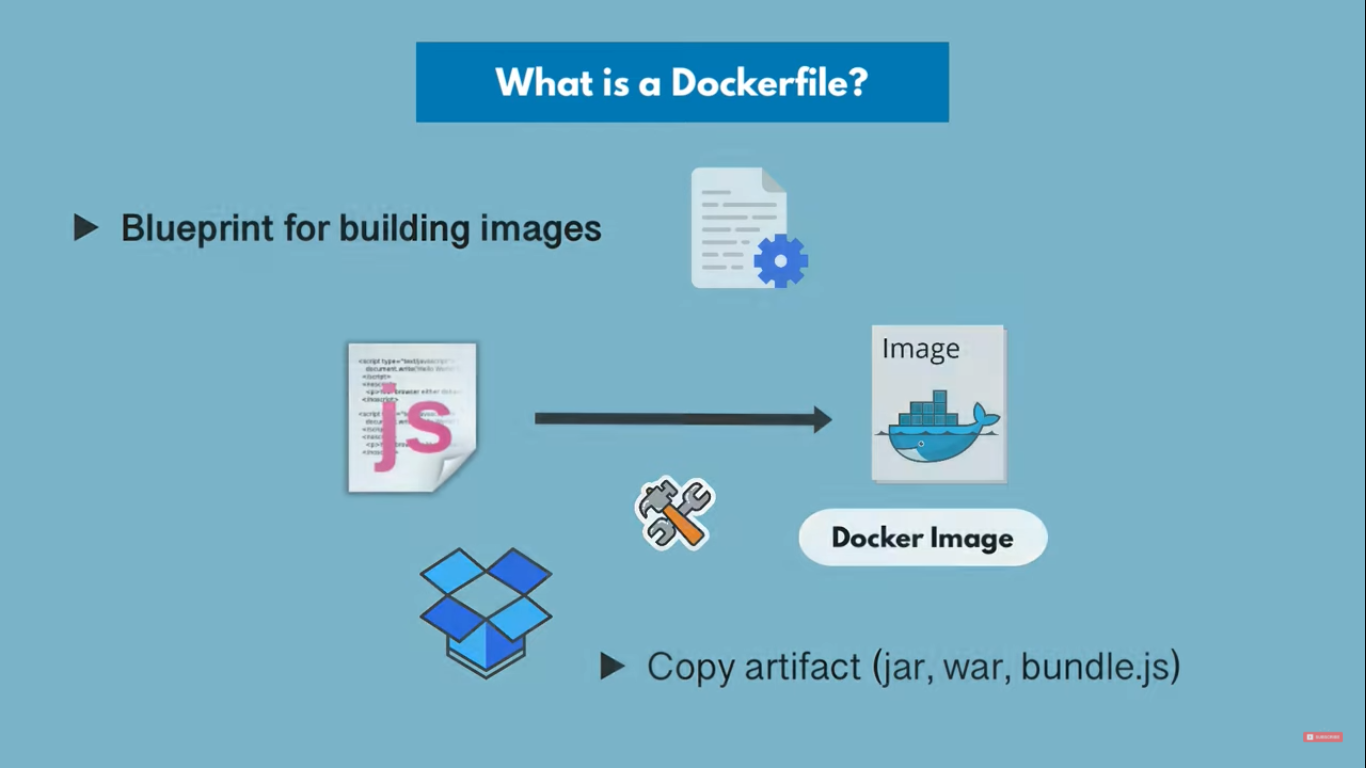

### Create docker network

`docker network create mongo-network`

### Start the mongodb container

```bash
docker run -d \
-p 27017:27017 \
-e MONGO_INITDB_ROOT_USERNAME=admin \
-e MONGO_INITDB_ROOT_PASSWORD=password \
--name mongodb \
--net mongo-network \
mongo
```

### Start the mongodb express container

```bash
docker run -d \
-p 8081:8081 \
-e ME_CONFIG_MONGODB_ADMINUSERNAME=admin \
-e ME_CONFIG_MONGODB_ADMINPASSWORD=password \
-e ME_CONFIG_MONGODB_SERVER=mongodb \
--name mongo-express \
--net mongo-network \
mongo-express
```

### Listing down the docker images



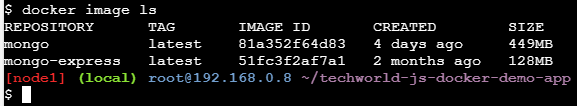

### Listing down the docker containers

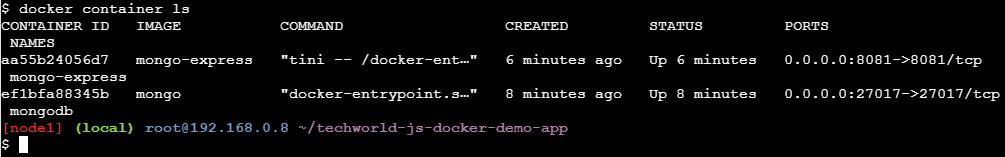

### What is docker volume?

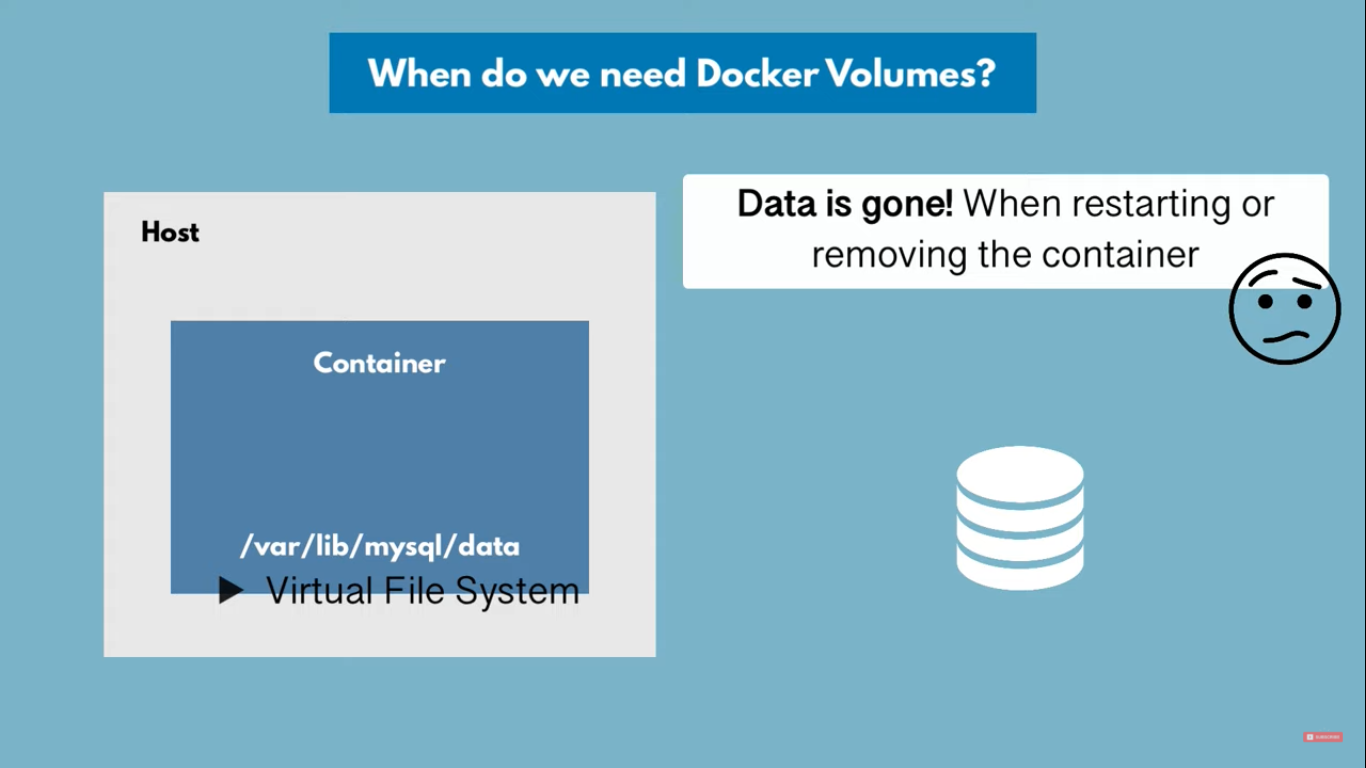

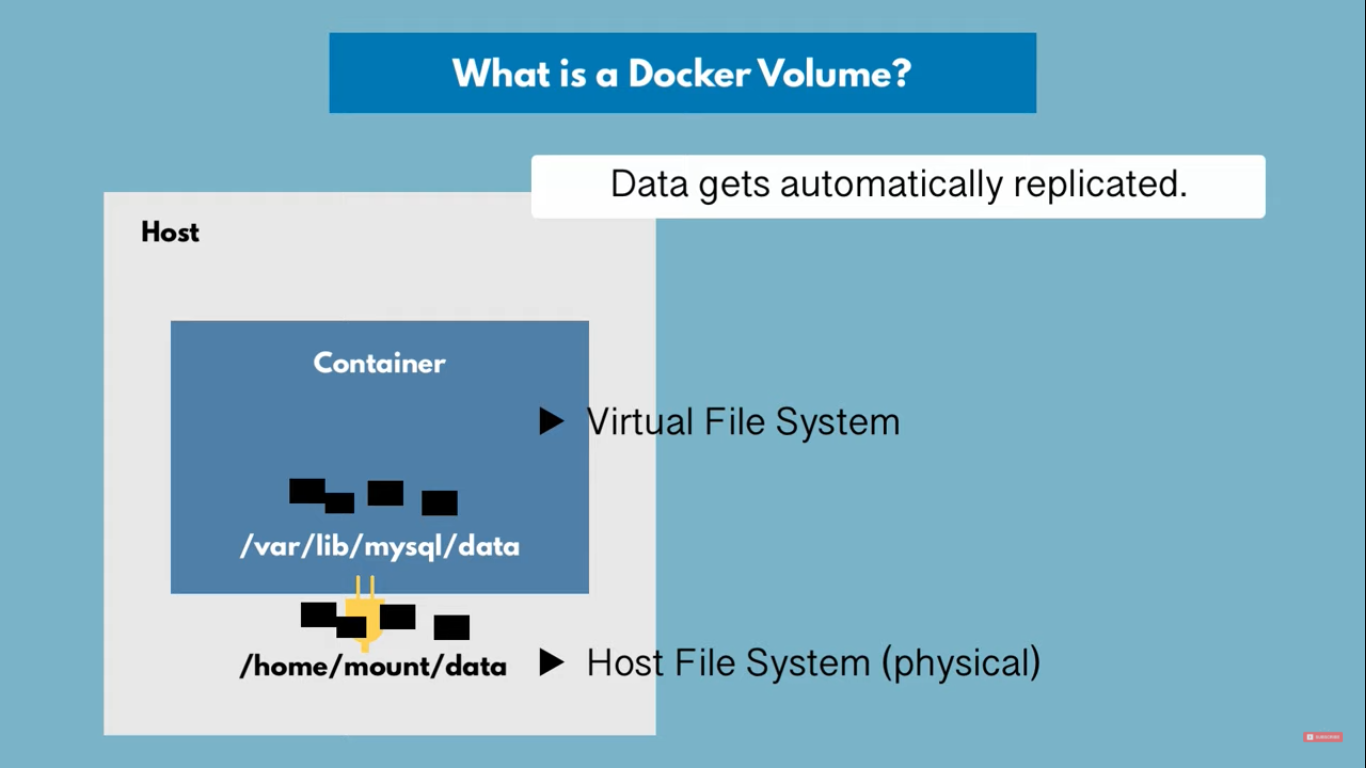

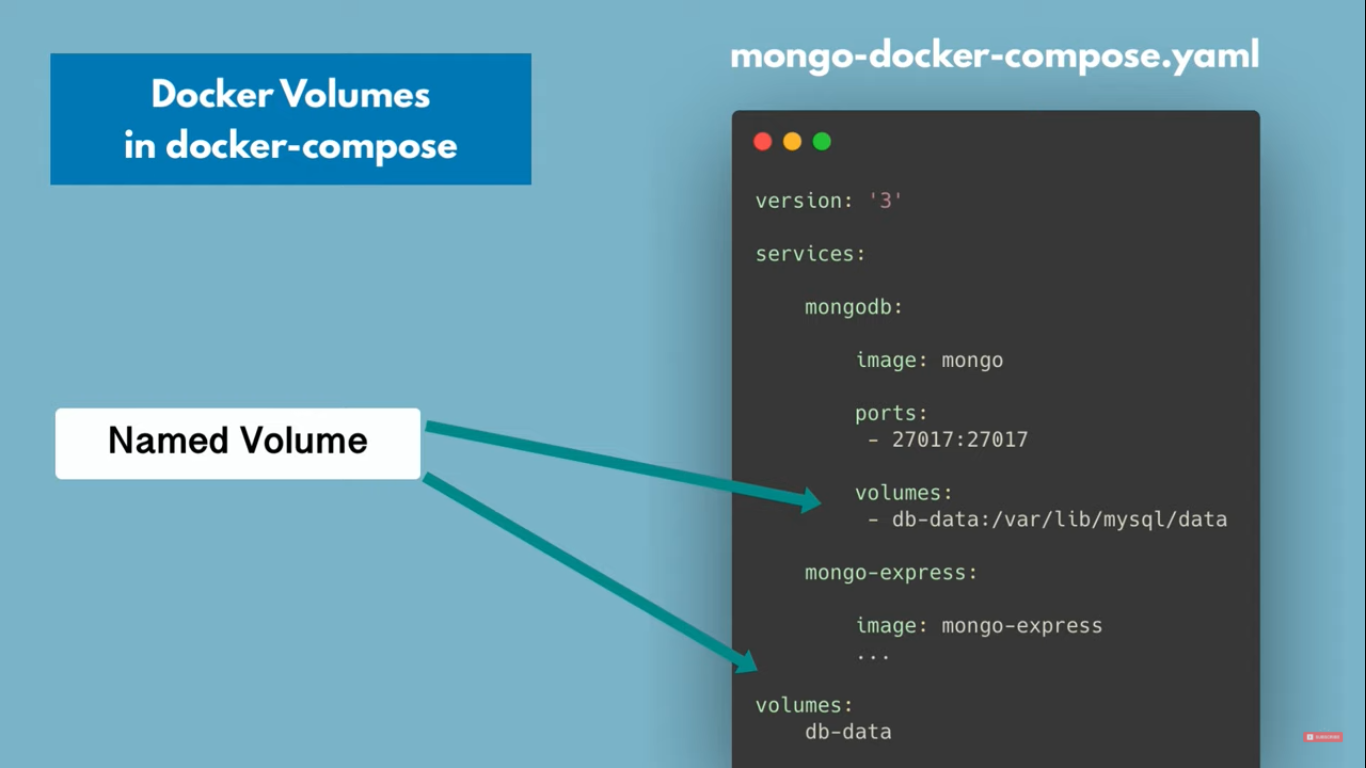

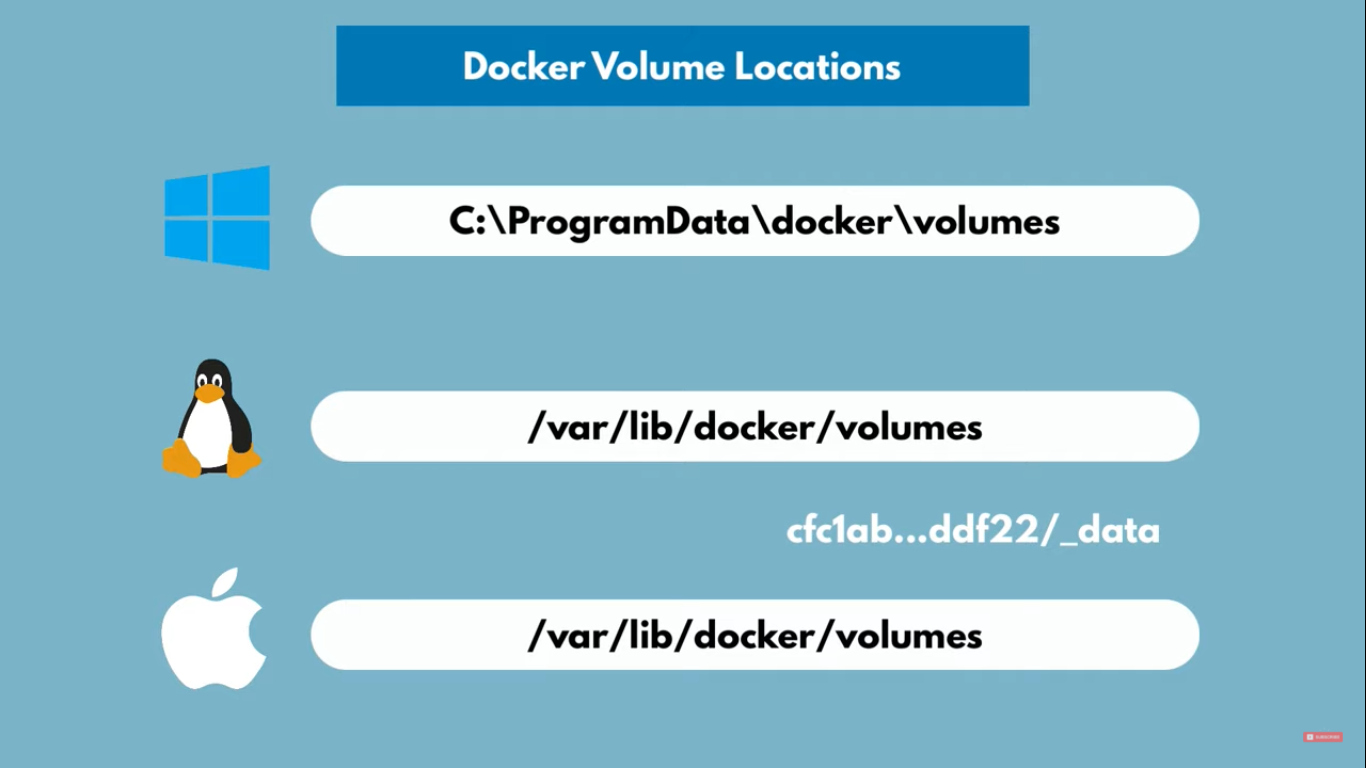

## Build and run the app container

Duration: 2

### Explore `Dockerfile`

```docker
FROM node:13-alpine

ENV MONGO_DB_USERNAME=admin \
    MONGO_DB_PWD=password

RUN mkdir -p /home/app

COPY ./app /home/app

# set default dir so that next commands executes in /home/app dir
WORKDIR /home/app

# will execute npm install in /home/app because of WORKDIR
RUN npm install

# no need for /home/app/server.js because of WORKDIR
CMD ["node", "server.js"]
```



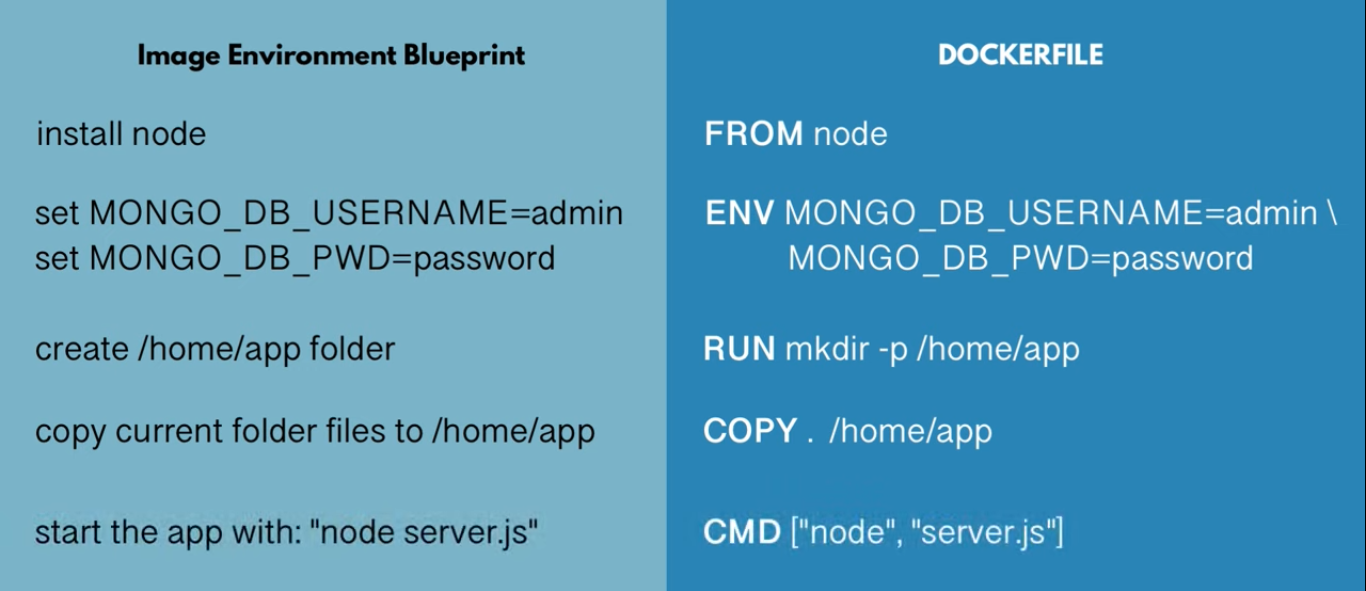

### Explore docker compose file

`docker-compose-yaml`

```yaml
version: '3'
services:
  # my-app:
  # image: ${docker-registry}/my-app:1.0
  # ports:
  # - 3000:3000
  mongodb:
    image: mongo
    ports:
      - 27017:27017
    environment:
      - MONGO_INITDB_ROOT_USERNAME=admin
      - MONGO_INITDB_ROOT_PASSWORD=password
    volumes:
      - mongo-data:/data/db
  mongo-express:
    image: mongo-express
    ports:
      - 8080:8081
    environment:
      - ME_CONFIG_MONGODB_ADMINUSERNAME=admin
      - ME_CONFIG_MONGODB_ADMINPASSWORD=password
      - ME_CONFIG_MONGODB_SERVER=mongodb
volumes:
  mongo-data:
    driver: local
```

### Start containers with docker compose

Go back to the main directory. Make sure you see something like this:



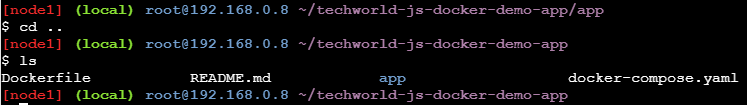

Run the docker compose using this command: `docker-compose up`

This will start both containers with a single command and also takes care of creating a common network. We will simulate what Jenkins will do later in CI stage. We will compose a NodeJS docker image. We are gonna need a docker file for that.

### Build the docker image

`docker build -t my-app:1.0 .`

### Run the container to verify

`docker run my-app:1.0`

<!---------------------------->

## Verify the app locally

Duration: 2

Data input in node JS and saved in mongoDB.



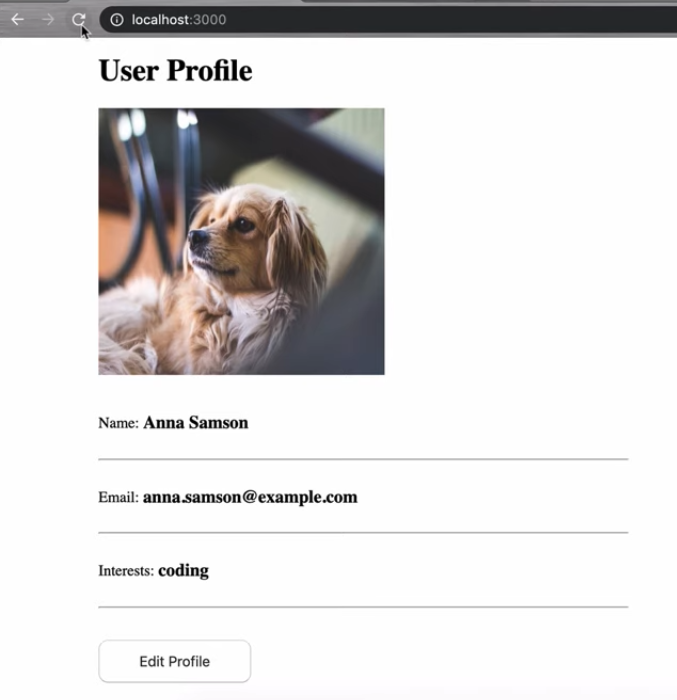

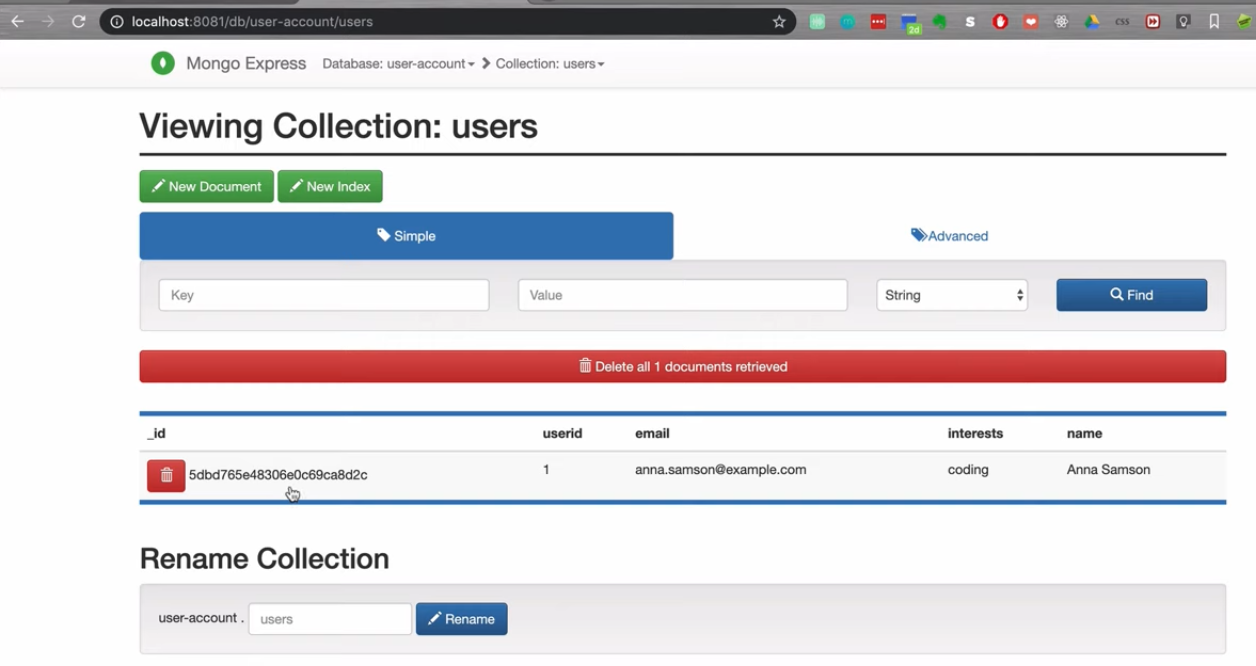

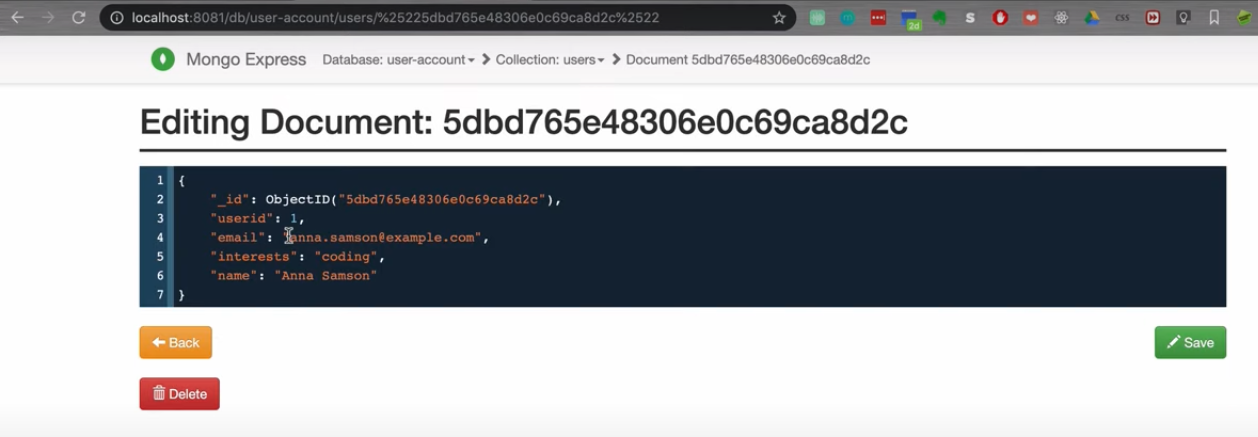

## Push docker image to AWS EKS

Duration: 2

### Create private docker repository on AWS



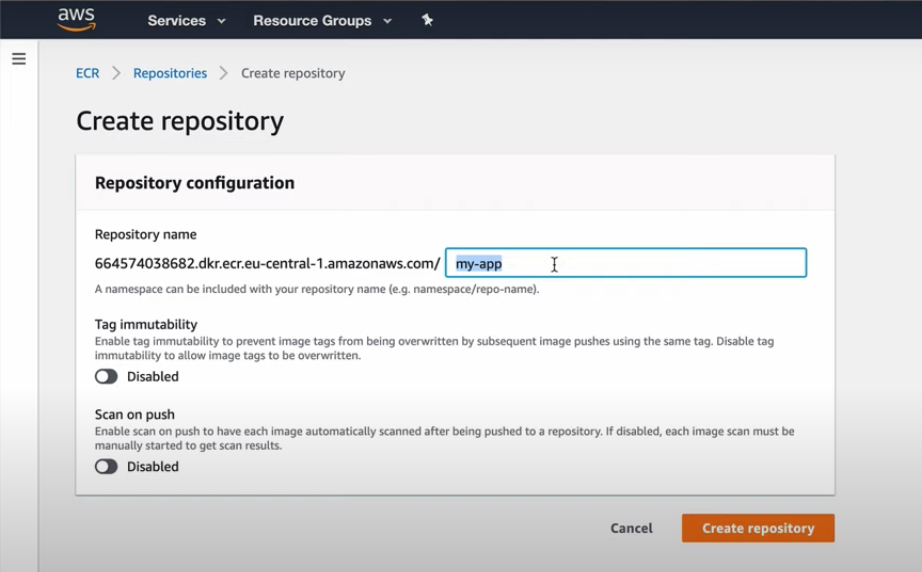

### Analyze the ECR push commands

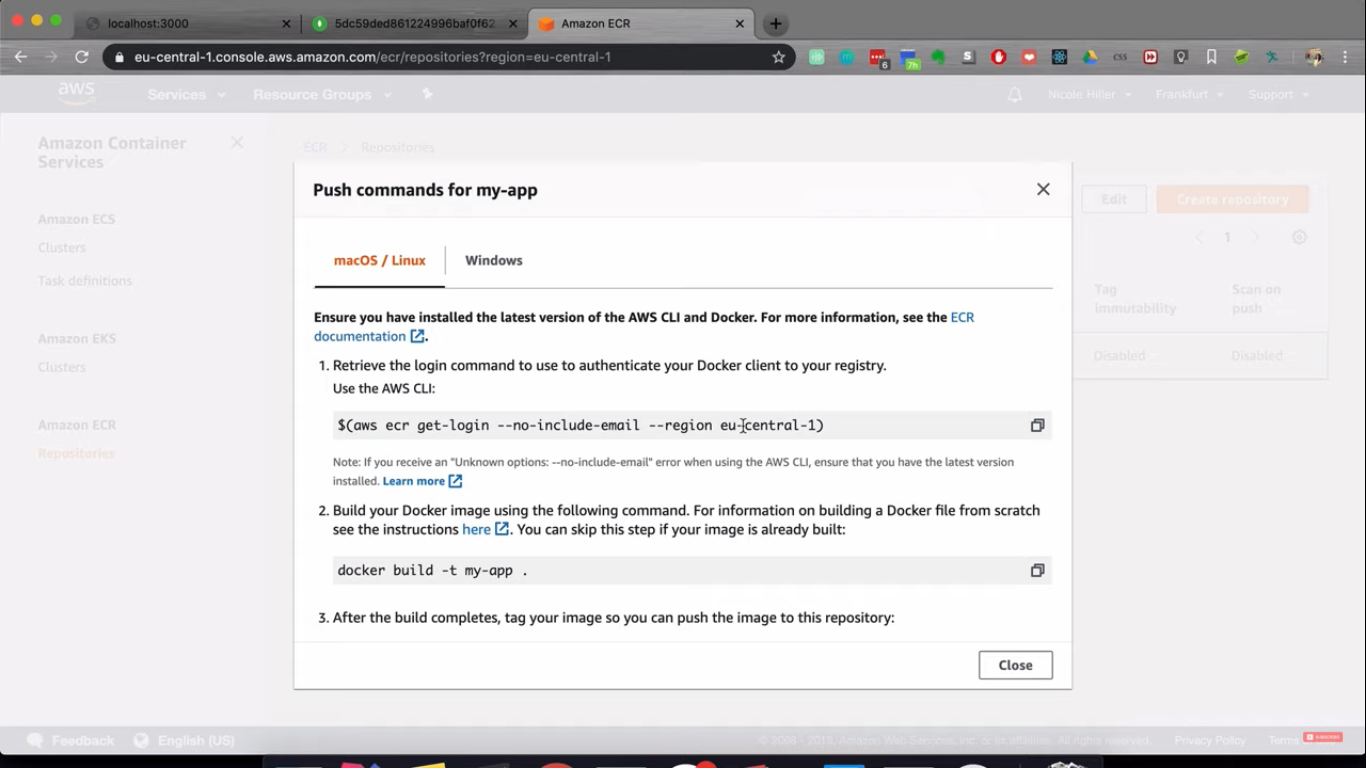

### Configure AWS CLI and Credentials and AWS push commands

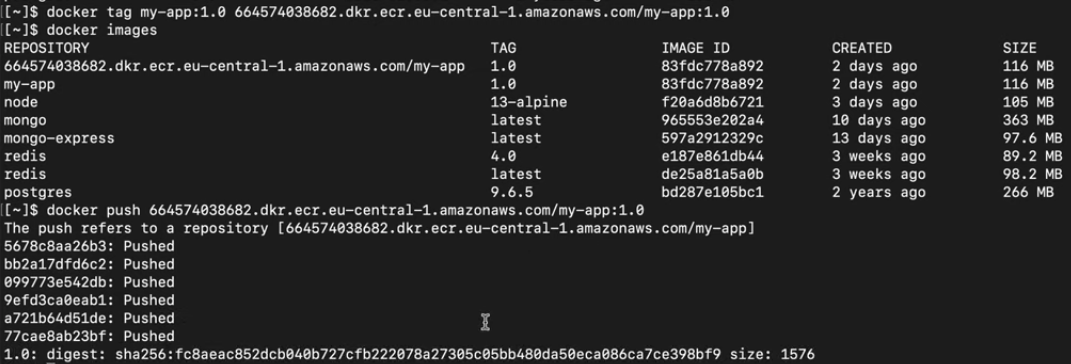

### Run a dry cycle

Lets run a dry cycle. We will modify server.js a little bit and then build the docker image with version 1.1 this time. Now tag it and push to AWS ECR.



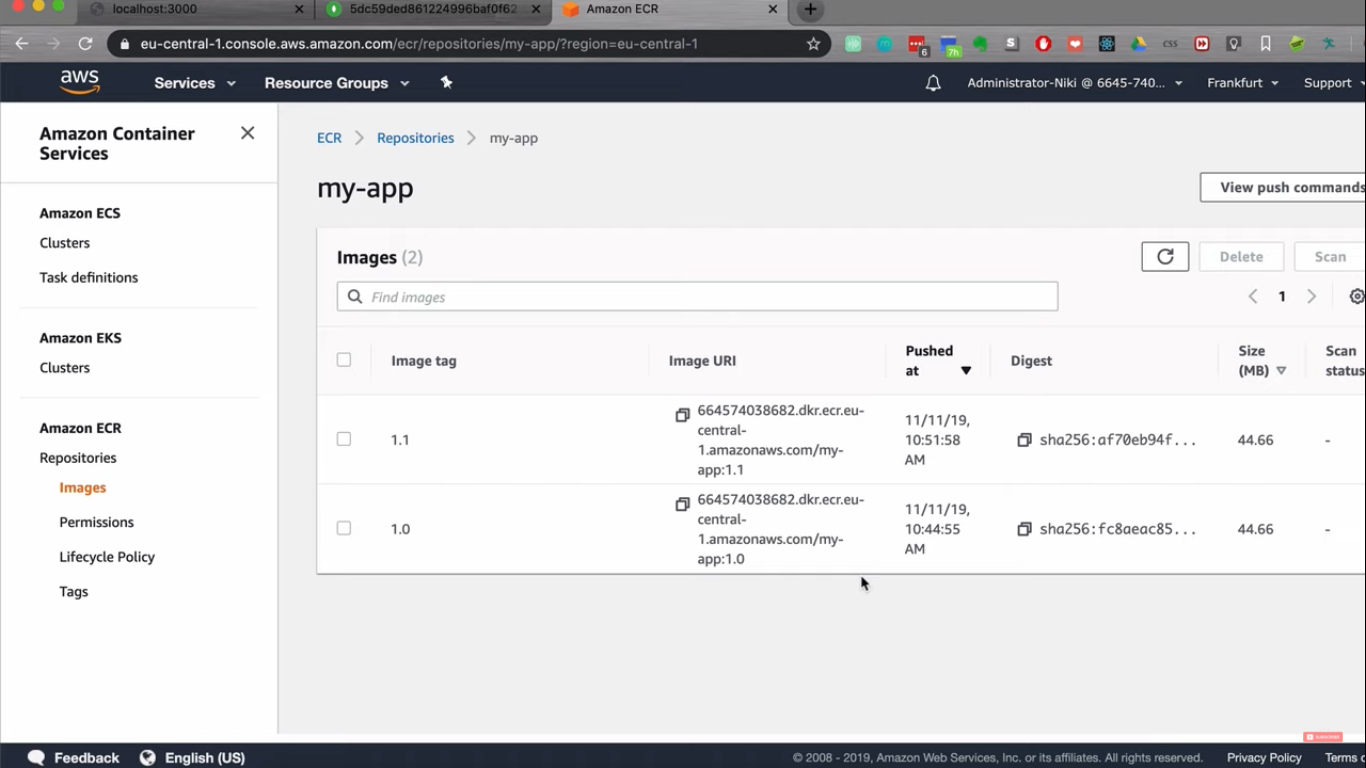

### Add docker image and re-run

We will now add our image in docker compose and trigger the 

```yaml
version: '3'
services:
  my-app:
    image: ${docker-registry}/my-app:1.0
    ports:
      - 3000:3000
  mongodb:
    image: mongo
    ports:
      - 27017:27017
    environment:
      - MONGO_INITDB_ROOT_USERNAME=admin
      - MONGO_INITDB_ROOT_PASSWORD=password
    volumes:
      - mongo-data:/data/db
  mongo-express:
    image: mongo-express
    ports:
      - 8080:8081
    environment:
      - ME_CONFIG_MONGODB_ADMINUSERNAME=admin
      - ME_CONFIG_MONGODB_ADMINPASSWORD=password
      - ME_CONFIG_MONGODB_SERVER=mongodb
volumes:
  mongo-data:
    driver: local
```

<!---------------------------->

## Conclusion

Duration: 2

Congratulations!

### What we've covered

Successfully created and deployed our app as a docker container on cloud.

### Next steps

- Analyze the role of this in the overall MLOps process
- Explore other options for registration and deployment
- Use Jenkins for robust CI/CD pipeline instead of manually building the images

### Links and References

1. [Deploying docker app using Jenkins pipeline | CI/CD Of Docker | DevOps - Jenkins Pipeline Tutorial](https://youtu.be/gdbA3vR2eDs)
2. [Developing with Docker - Docker in Practice || Docker Tutorial 8](https://youtu.be/6YisG2GcXaw?list=PLy7NrYWoggjzfAHlUusx2wuDwfCrmJYcs)
3. [Docker Compose Tutorial - Docker in Practice || Docker Tutorial 9](https://youtu.be/MVIcrmeV_6c?list=PLy7NrYWoggjzfAHlUusx2wuDwfCrmJYcs)
4. [Docker Compose Tutorial - Docker in Practice || Docker Tutorial 10](https://youtu.be/WmcdMiyqfZs?list=PLy7NrYWoggjzfAHlUusx2wuDwfCrmJYcs)
5. [Docker Compose Tutorial - Docker in Practice || Docker Tutorial 11](https://www.youtube.com/watch?v=vWSRWpOPHws&list=PLy7NrYWoggjzfAHlUusx2wuDwfCrmJYcs&index=11)
6. [Docker Compose Tutorial - Docker in Practice || Docker Tutorial 12](https://www.youtube.com/watch?v=ZowjOhpAcIc&list=PLy7NrYWoggjzfAHlUusx2wuDwfCrmJYcs&index=13)
7. [Docker Compose Tutorial - Docker in Practice || Docker Tutorial 13](https://youtu.be/SBUCYJgg4Mk?list=PLy7NrYWoggjzfAHlUusx2wuDwfCrmJYcs)